# Homework 4 - Pandas

## NAME: Yijun Liang

## STUDENT ID: 3033099994

In [41]:
# Load required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Pandas Introduction

## Reading File

#### 1.1) Read the CSV file called 'data3.csv' into a dataframe called df. 
#### Data description
* Data source: http://www.fao.org/nr/water/aquastat/data/query/index.html
* Data, units:
* GDP, current USD (CPI adjusted)
* NRI, mm/yr
* Population density, inhab/km^2
* Total area of the country, 1000 ha = 10km^2
* Total Population, unit 1000 inhabitants

In [42]:
# your code here
df = pd.read_csv('data3.csv')

#### 1.2) Display the first 10 rows of the dataframe.

In [43]:
# your code here
print(df.head(10))

Area  Area Id              Variable Name  Variable Id    Year  \
0  Argentina      9.0  Total area of the country       4100.0  1962.0   
1  Argentina      9.0  Total area of the country       4100.0  1967.0   
2  Argentina      9.0  Total area of the country       4100.0  1972.0   
3  Argentina      9.0  Total area of the country       4100.0  1977.0   
4  Argentina      9.0  Total area of the country       4100.0  1982.0   
5  Argentina      9.0  Total area of the country       4100.0  1987.0   
6  Argentina      9.0  Total area of the country       4100.0  1992.0   
7  Argentina      9.0  Total area of the country       4100.0  1997.0   
8  Argentina      9.0  Total area of the country       4100.0  2002.0   
9  Argentina      9.0  Total area of the country       4100.0  2007.0   

      Value Symbol  Other  
0  278040.0      E    NaN  
1  278040.0      E    NaN  
2  278040.0      E    NaN  
3  278040.0      E    NaN  
4  278040.0      E    NaN  
5  278040.0      E    NaN  
6  27804

#### 1.3) Display the column names.

In [44]:
# your code here
print(df.columns)

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Other'],
      dtype='object')


#### 1.4) Use iloc to display the first 3 rows and first 4 columns.

In [45]:
# your code here
print(df.iloc[:3, :4])

Area  Area Id              Variable Name  Variable Id
0  Argentina      9.0  Total area of the country       4100.0
1  Argentina      9.0  Total area of the country       4100.0
2  Argentina      9.0  Total area of the country       4100.0


## Data Preprocessing

#### 2.1) Find all the rows that  have 'NaN' in the 'Symbol' column. Display first 5 rows.

##### Hint : You might have to use a mask

In [46]:
# your code here
df[df.loc[:,'Symbol'].isnull()]
print(df.head(5))

Area  Area Id              Variable Name  Variable Id    Year  \
0  Argentina      9.0  Total area of the country       4100.0  1962.0   
1  Argentina      9.0  Total area of the country       4100.0  1967.0   
2  Argentina      9.0  Total area of the country       4100.0  1972.0   
3  Argentina      9.0  Total area of the country       4100.0  1977.0   
4  Argentina      9.0  Total area of the country       4100.0  1982.0   

      Value Symbol  Other  
0  278040.0      E    NaN  
1  278040.0      E    NaN  
2  278040.0      E    NaN  
3  278040.0      E    NaN  
4  278040.0      E    NaN  


#### 2.2)  Now, we will try to get rid of the NaN valued rows and columns. First, drop the column 'Other' which only has 'NaN' values. Then drop all other rows that have any column with a value 'NaN'. Store the result in place. Then display the last 5 rows of the dataframe.

In [47]:
# your code here
df.drop('Other', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
print(df.tail(5))

Area  Area Id                  Variable Name  \
385  United States of America    231.0  National Rainfall Index (NRI)   
386  United States of America    231.0  National Rainfall Index (NRI)   
387  United States of America    231.0  National Rainfall Index (NRI)   
388  United States of America    231.0  National Rainfall Index (NRI)   
389  United States of America    231.0  National Rainfall Index (NRI)   

     Variable Id    Year   Value Symbol  
385       4472.0  1981.0   949.2      E  
386       4472.0  1984.0   974.6      E  
387       4472.0  1992.0  1020.0      E  
388       4472.0  1996.0  1005.0      E  
389       4472.0  2002.0   938.7      E  


#### 2.3) For our analysis we do not want all the columns in our dataframe. Lets  drop all the redundant columns/ features.   
#### **Drop columns**: **Area Id, Variable Id, Symbol**. Save the new dataframe as df1. Display the first 5 rows of the new dataframe.

In [48]:
# your code here
df1 = df.drop(['Area Id', 'Variable Id', 'Symbol'], axis=1)
print(df1.head(5))

Area              Variable Name    Year     Value
0  Argentina  Total area of the country  1962.0  278040.0
1  Argentina  Total area of the country  1967.0  278040.0
2  Argentina  Total area of the country  1972.0  278040.0
3  Argentina  Total area of the country  1977.0  278040.0
4  Argentina  Total area of the country  1982.0  278040.0


#### 2.4) Display all the unique values in your new dataframe for each of the columns: Area, Variable Name, Year.

In [49]:
# your code here
print(pd.unique(df1['Area']))
print(pd.unique(df1['Variable Name']))
print(pd.unique(df1['Year']))

['Argentina' 'Australia' 'Germany' 'Iceland' 'Ireland' 'Sweden'
 'United States of America']
['Total area of the country' 'Total population' 'Population density'
 'Gross Domestic Product (GDP)' 'National Rainfall Index (NRI)']
[1962. 1967. 1972. 1977. 1982. 1987. 1992. 1997. 2002. 2007. 2012. 2014.
 2015. 1963. 1970. 1974. 1978. 1984. 1990. 1964. 1981. 1985. 1996. 2001.
 1969. 1973. 1979. 1993. 1971. 1975. 1986. 1991. 1998. 2000. 1965. 1983.
 1988. 1995.]


#### 2.5) Convert the 'Year' column float values to pandas datetime objects, where each year is represented as the first day of that year. Also display the first 5 values of the Year column after conversion.

##### For eg: 1962.0 will be represented as 1962-01-01 

In [50]:
# your code here
# df1.loc[:,'Year'] = df1.loc[;]

df1.loc[:,'Year'] = pd.to_datetime(df1.loc[:,'Year'], format='%Y') 
print(df1.loc[:,'Year'].head(5))

0   1962-01-01
1   1967-01-01
2   1972-01-01
3   1977-01-01
4   1982-01-01
Name: Year, dtype: datetime64[ns]


## Plot

#### 3.1) Plot a bar graph showing the count for each unique value in the column 'Area'. Give it a title.

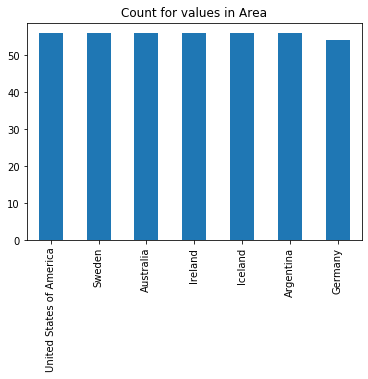

In [51]:
# your code here
df1['Area'].value_counts().plot(kind='bar', title='Count for values in Area')

## Extract specific statistics from the preprocessed data:

#### 4.1)  Create a dataframe 'dftemp' to store rows where Area is 'Iceland'. Display the dataframe.

In [52]:
# your code here
dftemp = df1.loc[df1['Area']=='Iceland',:]
print(dftemp)

Area                  Variable Name       Year         Value
166  Iceland      Total area of the country 1962-01-01  1.030000e+04
167  Iceland      Total area of the country 1967-01-01  1.030000e+04
168  Iceland      Total area of the country 1972-01-01  1.030000e+04
169  Iceland      Total area of the country 1977-01-01  1.030000e+04
170  Iceland      Total area of the country 1982-01-01  1.030000e+04
171  Iceland      Total area of the country 1987-01-01  1.030000e+04
172  Iceland      Total area of the country 1992-01-01  1.030000e+04
173  Iceland      Total area of the country 1997-01-01  1.030000e+04
174  Iceland      Total area of the country 2002-01-01  1.030000e+04
175  Iceland      Total area of the country 2007-01-01  1.030000e+04
176  Iceland      Total area of the country 2012-01-01  1.030000e+04
177  Iceland      Total area of the country 2014-01-01  1.030000e+04
178  Iceland               Total population 1962-01-01  1.826000e+02
179  Iceland               Total populatio

#### 4.2) Print the years (with the same format as 2.5) when the National Rainfall Index (NRI) was greater than 900 and less than 950 in Iceland. Use the dataframe you created in the previous question 'dftemp'. 

In [53]:
# your code here
print(dftemp.loc[(dftemp['Variable Name']=='National Rainfall Index (NRI)')&(dftemp['Value']>=900)&(dftemp['Value']<=950),'Year'].apply(lambda x: x.year))

217    1981
221    1998
Name: Year, dtype: int64


## US statistics: 

#### 5.1) Create a new DataFrame called **`df_usa`** that only contains values where 'Area' is equal to 'United States of America'. Set the indices to be the 'Year' column   (Use .set_index( ), set inplace=True ). Display the dataframe head.

In [58]:
# your code here
df_usa = df1.loc[df1['Area']=='United States of America',:]
df_usa.set_index('Year', inplace=True)
print(df_usa.head())

,Area,Variable Name,Value
Year,,,
1962-01-01,United States of America,Total area of the country,962909.0
1967-01-01,United States of America,Total area of the country,962909.0
1972-01-01,United States of America,Total area of the country,962909.0
1977-01-01,United States of America,Total area of the country,962909.0
1982-01-01,United States of America,Total area of the country,962909.0


#### 5.2) Pivot the DataFrame so that the unique values in the column 'Variable Name' becomes the columns. The DataFrame values should be the ones in the the 'Value' column. Save it in df_usa. Display the dataframe head.

In [59]:
# your code here
df_usa = df_usa.pivot(columns='Variable Name', values='Value')
print(df_usa.head())

Variable Name  Gross Domestic Product (GDP)  National Rainfall Index (NRI)  \
Year                                                                         
1962-01-01                     6.050000e+11                            NaN   
1965-01-01                              NaN                          928.5   
1967-01-01                     8.620000e+11                            NaN   
1969-01-01                              NaN                          952.2   
1972-01-01                     1.280000e+12                            NaN   

Variable Name  Population density  Total area of the country  Total population  
Year                                                                            
1962-01-01                  19.93                   962909.0          191861.0  
1965-01-01                    NaN                        NaN               NaN  
1967-01-01                  21.16                   962909.0          203713.0  
1969-01-01                    NaN               

#### 5.3) Rename new columns to  ['GDP','NRI','PD','Area','Population'] and display the head.

In [60]:
# your code here
df_usa = df_usa.rename(columns = {'Gross Domestic Product (GDP)':'GDP', 'National Rainfall Index (NRI)':'NRI', 'Population density':'PD', 'Total area of the country':'Area', 'Total population':'Population'})
print(df_usa.head())

Variable Name           GDP    NRI     PD      Area  Population
Year                                                           
1962-01-01     6.050000e+11    NaN  19.93  962909.0    191861.0
1965-01-01              NaN  928.5    NaN       NaN         NaN
1967-01-01     8.620000e+11    NaN  21.16  962909.0    203713.0
1969-01-01              NaN  952.2    NaN       NaN         NaN
1972-01-01     1.280000e+12    NaN  22.14  962909.0    213220.0


#### 5.4) Replace all 'Nan' values in df_usa with 0. Display the head of the dataframe.

In [62]:
# your code here
df_usa.fillna(0, inplace=True)
df_usa.head()

Variable Name,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,0.0,19.93,962909.0,191861.0
1965-01-01,0.000000e+00,928.5,0.00,0.0,0.0
1967-01-01,8.620000e+11,0.0,21.16,962909.0,203713.0
1969-01-01,0.000000e+00,952.2,0.00,0.0,0.0
1972-01-01,1.280000e+12,0.0,22.14,962909.0,213220.0


## Use df_usa:

#### 6.1) Multiply the 'Area' column for all rows by 10 (so instead of 1000 ha, the unit becomes 100 ha = 1km^2). Display the dataframe head.

In [63]:
# your code here
df_usa.loc[:,'Area'] = df_usa.loc[:,'Area']*10
print(df_usa.head())

Variable Name           GDP    NRI     PD       Area  Population
Year                                                            
1962-01-01     6.050000e+11    0.0  19.93  9629090.0    191861.0
1965-01-01     0.000000e+00  928.5   0.00        0.0         0.0
1967-01-01     8.620000e+11    0.0  21.16  9629090.0    203713.0
1969-01-01     0.000000e+00  952.2   0.00        0.0         0.0
1972-01-01     1.280000e+12    0.0  22.14  9629090.0    213220.0


#### 6.2) Create a new column in df_usa called 'GDP/capita' and populate it with the calculated GDP per capita. Round the results to two decimal points. Display the dataframe head.
GDP per capita = (GDP / Population) * 1000

In [70]:
# your code here
df_usa['GDP/capita'] = df_usa['GDP']/df_usa['Population']*1000
df_usa['GDP/capita'].round(decimals=2)
print(df_usa.head())

Variable Name           GDP    NRI     PD       Area  Population    GDP/capita
Year                                                                          
1962-01-01     6.050000e+11    0.0  19.93  9629090.0    191861.0  3.153325e+09
1965-01-01     0.000000e+00  928.5   0.00        0.0         0.0           NaN
1967-01-01     8.620000e+11    0.0  21.16  9629090.0    203713.0  4.231443e+09
1969-01-01     0.000000e+00  952.2   0.00        0.0         0.0           NaN
1972-01-01     1.280000e+12    0.0  22.14  9629090.0    213220.0  6.003189e+09


#### 6.3) Find the maximum value of the 'NRI' column in the US (using pandas methods). What year does the max value occur? Display the values.

In [82]:
# your code here
print(df_usa.loc[df_usa['NRI']==df_usa['NRI'].max(),'NRI'])
print(df_usa['NRI'].max())

Year
1992-01-01    1020.0
Name: NRI, dtype: float64
1020.0


## Congratulations on completing hw4! Don't forget to click Kernel -> Restart & Run All, save your file, download or print as pdf, and submit pdf to Gradescope.